In [1]:
from dplython import *

In [2]:
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
dia = diamonds.iloc[:,1:8]

In [4]:
dia.groupby(by='cut')['price'].mean()

cut
Fair         4358.757764
Good         3928.864452
Ideal        3457.541970
Premium      4584.257704
Very Good    3981.759891
Name: price, dtype: float64

In [5]:
data1 = diamonds>>select(X.carat,X.cut,X.color,X.clarity,X.depth,X.table,X.price)


In [6]:
plot_data = data1>>group_by(X.cut)>> \
summarize(average_price = X.price.mean())>> \
arrange(-X.average_price)
          
          
plot_data['average_price'] = round(plot_data['average_price'],2)          
plot_data.head()

,cut,average_price
3,Premium,4584.26
0,Fair,4358.76
4,Very Good,3981.76
1,Good,3928.86
2,Ideal,3457.54


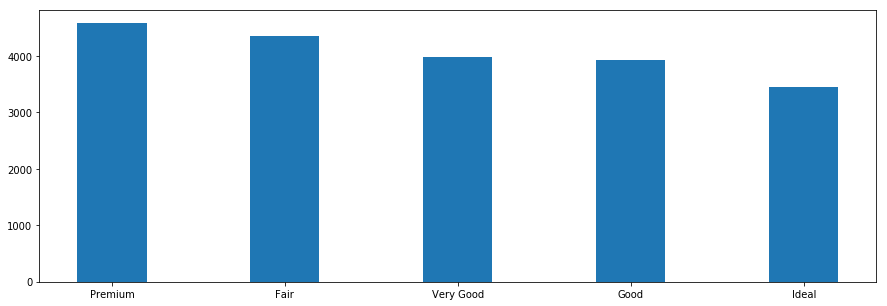

In [8]:
#comparison -Between 1 categorival column and 1 numerical columns -Bar chart
#VerticaL bar chart and Hari.bar chart
#To icnrease the size of plotting area



from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=[15,5]
plt.bar(plot_data['cut'],plot_data['average_price'],width = .4)
plt.show()

<BarContainer object of 5 artists>

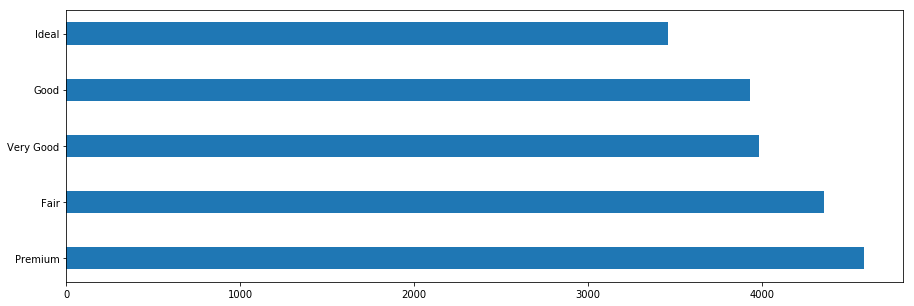

In [9]:
#horizontal bar
plt.barh(plot_data['cut'],plot_data['average_price'],height = .4)

<Container object of 5 artists>

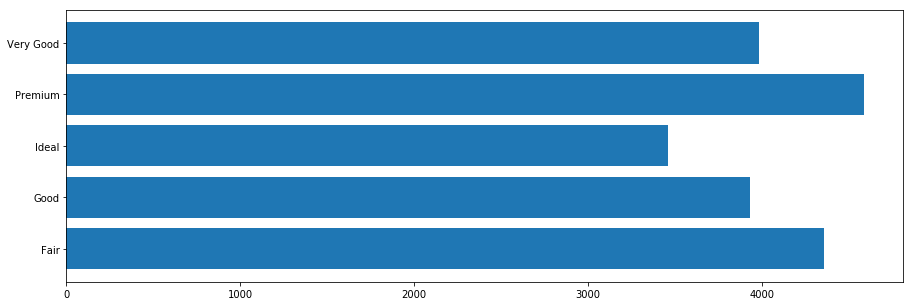

In [34]:
plt.barh(plot_data['cut'],plot_data['average_price'])

In [10]:
import matplotlib
matplotlib.__version__


'2.2.2'

In [10]:
#Cmpersion-2 categorical column and 1 numberical column

#3 methods: Used 2nd category as filter
# Grouped bar chart
#stacked bar chart
from ipywidgets import widgets,interact
data1.head()
colos = widgets.Dropdown(options = ['All']+list(data1['color'].unique()),
                        value = 'All',
                        description = "Select the color")
car  =widgets.Dropdown(options=['All']+list(data1['clarity'].unique()),
                      value='All',
                      description="Select the clarity")
def plotit(x,y):
    if (colos.value!='All') & (car.value!='All') :
        df2 = data1[(data1.color ==colos.value) & (data1.clarity == car.value)]
    elif(colos.value=='All') and (car.value!='All') :
        df2 = data1[(data1.clarity ==car.value)]
    elif(colos.value!='All') and (car.value=='All') :
        df2 = data1[(data1.color ==colos.value)]
    else:
        df2 = data1
    #print(df2)
    avg = df2>>group_by(X.cut)>>summarize(avg_price = X.price.mean())>>arrange(-X.avg_price)
    plt.rcParams['figure.figsize']=[12,5]
    plt.bar(avg['cut'],avg['avg_price'],width = .4)
interact(plotit,x=colos,y =car)

interactive(children=(Dropdown(description='Select the color', options=('All', 'E', 'I', 'J', 'H', 'F', 'G', 'D'), value='All'), Dropdown(description='Select the clarity', options=('All', 'SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'), value='All'), Output()), _dom_classes=('widget-interact',))

<function __main__.plotit>

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


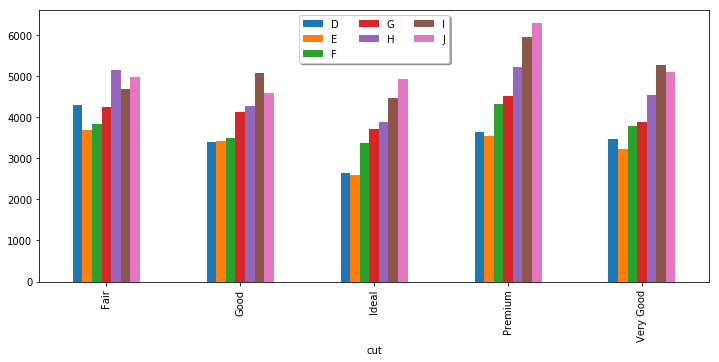

In [44]:
#To group by on cut and color
data2 = data1>>group_by(X.cut,X.color)>>summarize(average_price = X.price.mean()) >> \
arrange(-X.average_price)
data2['average_price']=round(data2['average_price'],2)
data2.head()

long_data = data2.pivot("cut","color","average_price")
long_data.plot(kind="bar")


ax=plt.subplot(1,1,1)
ax.legend(loc='upper center',bbox_to_anchor = (.5,1.00),ncol=3,shadow=True)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


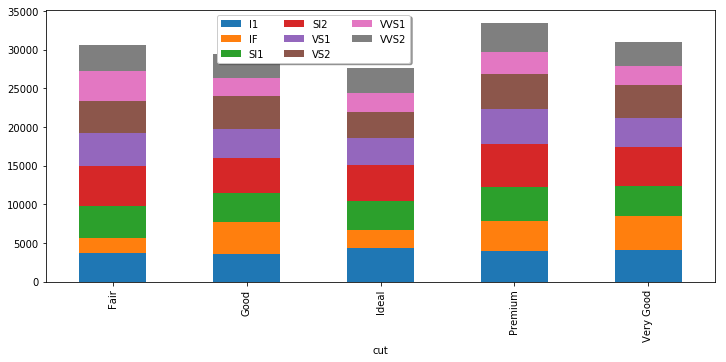

In [54]:
data3 = data1>>group_by(X.cut,X.clarity)>>summarize(average_price = X.price.mean()) >> \
arrange(-X.average_price)
data3['average_price']=round(data3['average_price'],2)
#data2.head()
long_data3= data3.pivot("cut","clarity","average_price")
long_data3.plot(kind="bar",stacked=True)


ax=plt.subplot(1,1,1)
ax.legend(loc='upper center',bbox_to_anchor = (.4,1.00),ncol=3,shadow=True)
plt.show()


In [48]:
data1.head()

,carat,cut,color,clarity,depth,table,price
0,0.23,Ideal,E,SI2,61.5,55.0,326
1,0.21,Premium,E,SI1,59.8,61.0,326
2,0.23,Good,E,VS1,56.9,65.0,327
3,0.29,Premium,I,VS2,62.4,58.0,334
4,0.31,Good,J,SI2,63.3,58.0,335


In [56]:
import os
import pandas as pd
os.chdir("D:/Term-2/Data Visualization/Day-4(18-02-2019)")

In [62]:
mtcars=pd.read_excel("Cars.xlsx")
mtcars.shape

(234, 10)

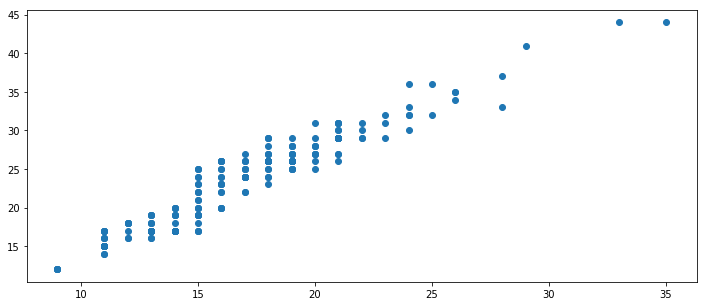

In [61]:
plt.scatter(mtcars['cty'],mtcars['hwy'])

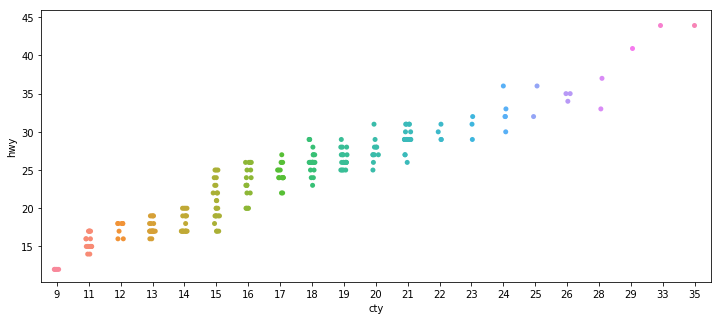

In [64]:
import seaborn as sns
sns.stripplot(x="cty",y="hwy",data=mtcars,jitter=True)

In [82]:
mtcar=mtcars[['displ','hwy','cty']]
matrix = mtcar.corr()
type(matrix)

pandas.core.frame.DataFrame

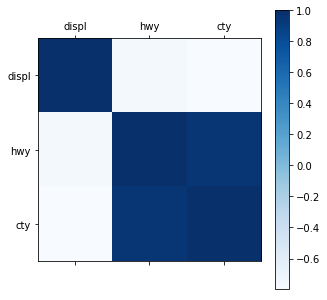

In [88]:
plt.matshow(matrix,cmap='Blues')
plt.xticks(range(len(mtcar.columns)),mtcar.columns)
plt.yticks(range(len(mtcar.columns)),mtcar.columns)
plt.colorbar()
